In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [4]:
 # Loading data
df = pd.read_csv("train.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# Seperate the features, X,  from the target variable, y
y = df['Cover_Type']
X = df.drop(columns='Cover_Type')

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 Fitting the Random Forest Model

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

Making Predictions Using the Random Forest Model

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

 Model Evaluation

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"], columns=["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Spruce/Fir,Lodgepole Pine,Ponderosa Pine,Cottonwood/Willow,Aspen,Douglas-fir,Krummholz
Spruce/Fir,408,91,1,0,14,1,21
Lodgepole Pine,104,353,18,0,42,17,6
Ponderosa Pine,0,0,490,23,2,67,0
Cottonwood/Willow,0,0,4,530,0,5,0
Aspen,0,16,8,0,512,9,0
Douglas-fir,0,1,33,12,1,470,0
Krummholz,18,0,0,0,0,0,503


Accuracy Score : 0.864021164021164
Classification Report
              precision    recall  f1-score   support

           1       0.77      0.76      0.77       536
           2       0.77      0.65      0.71       540
           3       0.88      0.84      0.86       582
           4       0.94      0.98      0.96       539
           5       0.90      0.94      0.92       545
           6       0.83      0.91      0.87       517
           7       0.95      0.97      0.96       521

    accuracy                           0.86      3780
   macro avg       0.86      0.86      0.86      3780
weighted avg       0.86      0.86      0.86      3780



Feature Importance

In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.21342061832535622, 'Elevation'),
 (0.0831920794814565, 'Horizontal_Distance_To_Roadways'),
 (0.08002635940868605, 'Id'),
 (0.06392340569838809, 'Horizontal_Distance_To_Fire_Points'),
 (0.0561550286271508, 'Horizontal_Distance_To_Hydrology'),
 (0.0475500237140779, 'Hillshade_9am'),
 (0.0473426854877218, 'Vertical_Distance_To_Hydrology'),
 (0.044519101136344774, 'Aspect'),
 (0.043424212480164426, 'Wilderness_Area4'),
 (0.04227204326152257, 'Hillshade_3pm'),
 (0.04012531619375332, 'Hillshade_Noon'),
 (0.033005013341648175, 'Slope'),
 (0.022388909853297164, 'Soil_Type10'),
 (0.01823589902933578, 'Soil_Type38'),
 (0.017344750838943768, 'Soil_Type3'),
 (0.017118713439429622, 'Soil_Type39'),
 (0.01628766208043933, 'Wilderness_Area3'),
 (0.016132672773505705, 'Wilderness_Area1'),
 (0.012432063598618271, 'Soil_Type4'),
 (0.010066649560320799, 'Soil_Type40'),
 (0.0077769001368772, 'Soil_Type30'),
 (0.005860466104935272, 'Soil_Type2'),
 (0.005788540220114835, 'Soil_Type17'),
 (0.0053489772291

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

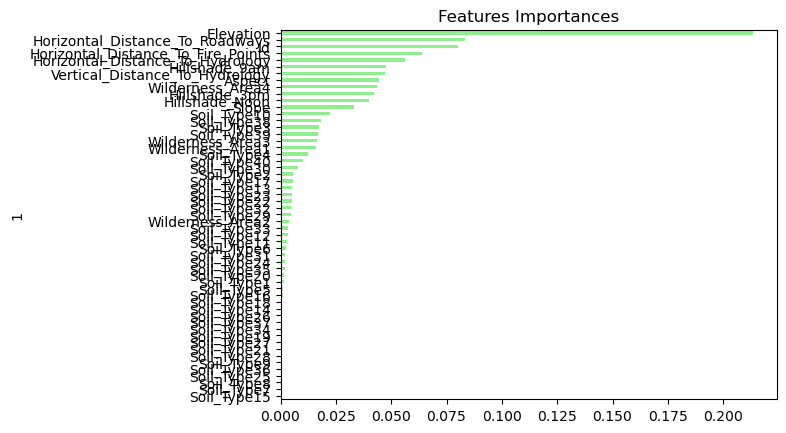

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)